In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets load the california House Pricing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing


In [3]:
#from sklearn.datasets import fetch_california_housing
#data = fetch_california_housing()
#X = data.data
#y = data.target

import pandas as pd
data = pd.read_csv("synthetic_california_housing.csv")
X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]



In [4]:
data.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [5]:
##let's check the description of the dataset
#print(data.DESCR)
print(data.describe())

            MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.118463    26.122000     5.498514     2.998710  2562.771000   
std       3.943854    14.692208     2.597448     1.151929  1442.477207   
min       1.562532     1.000000     1.001212     1.000047   111.000000   
25%       4.685639    13.000000     3.332150     2.001361  1279.000000   
50%       8.206900    26.000000     5.550885     3.002009  2544.000000   
75%      11.548314    39.000000     7.766995     3.992908  3891.250000   
max      14.996189    51.000000     9.985128     4.995570  4995.000000   

          AveOccup     Latitude    Longitude  MedHouseVal  
count  1000.000000  1000.000000  1000.000000  1000.000000  
mean      3.452249    36.911772  -119.001822     2.824655  
std       1.428691     2.927820     2.840271     1.318188  
min       1.004647    32.006275  -123.983988     0.507107  
25%       2.216615    34.316514  

In [6]:
print(data)
#print(data.data)

        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0     6.556292        47  3.919004   3.963616        3782  3.938485   
1    14.334643        12  3.997017   2.265081        3053  1.561822   
2    11.381918        16  7.025383   1.407570        4582  2.659932   
3     9.581890        24  9.947254   2.440936         798  4.908163   
4     3.606252        19  6.956553   2.081573         926  3.185258   
..         ...       ...       ...        ...         ...       ...   
995   2.736358        38  7.362788   4.708495        1241  4.205124   
996  13.883733         8  1.564207   4.879706         949  4.931658   
997   3.347052        50  8.554046   3.285042         466  3.025540   
998  14.328204         3  1.034379   1.572004        2997  1.013541   
999   7.521078        44  3.221415   2.498193        1189  5.249732   

      Latitude   Longitude  MedHouseVal  
0    35.808904 -116.652382     1.472567  
1    36.960427 -121.478560     1.325324  
2    32.077666 -119.0

In [7]:
X = data.drop("MedHouseVal", axis=1)  
y = data["MedHouseVal"]               

#print(data.target)

In [8]:
#print(data.feature_names)
print(data.columns.tolist())


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


Preparing The Dataset

In [9]:
#dataset=pd.DataFrame(data.data, columns=data.feature_names)
dataset = pd.DataFrame(data)

In [10]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup   Latitude  \
0   6.556292        47  3.919004   3.963616        3782  3.938485  35.808904   
1  14.334643        12  3.997017   2.265081        3053  1.561822  36.960427   
2  11.381918        16  7.025383   1.407570        4582  2.659932  32.077666   
3   9.581890        24  9.947254   2.440936         798  4.908163  36.920920   
4   3.606252        19  6.956553   2.081573         926  3.185258  41.864874   

    Longitude  MedHouseVal  
0 -116.652382     1.472567  
1 -121.478560     1.325324  
2 -119.091897     2.442471  
3 -123.244667     4.179044  
4 -117.821333     4.293275

In [11]:
#dataset['price']=data.target
dataset.rename(columns={"MedHouseVal": "price"}, inplace=True)


In [12]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup   Latitude  \
0   6.556292        47  3.919004   3.963616        3782  3.938485  35.808904   
1  14.334643        12  3.997017   2.265081        3053  1.561822  36.960427   
2  11.381918        16  7.025383   1.407570        4582  2.659932  32.077666   
3   9.581890        24  9.947254   2.440936         798  4.908163  36.920920   
4   3.606252        19  6.956553   2.081573         926  3.185258  41.864874   

    Longitude     price  
0 -116.652382  1.472567  
1 -121.478560  1.325324  
2 -119.091897  2.442471  
3 -123.244667  4.179044  
4 -117.821333  4.293275

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      1000 non-null   float64
 1   HouseAge    1000 non-null   int64  
 2   AveRooms    1000 non-null   float64
 3   AveBedrms   1000 non-null   float64
 4   Population  1000 non-null   int64  
 5   AveOccup    1000 non-null   float64
 6   Latitude    1000 non-null   float64
 7   Longitude   1000 non-null   float64
 8   price       1000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [14]:
##sumarizing the stats of the data
dataset.describe()

MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.118463    26.122000     5.498514     2.998710  2562.771000   
std       3.943854    14.692208     2.597448     1.151929  1442.477207   
min       1.562532     1.000000     1.001212     1.000047   111.000000   
25%       4.685639    13.000000     3.332150     2.001361  1279.000000   
50%       8.206900    26.000000     5.550885     3.002009  2544.000000   
75%      11.548314    39.000000     7.766995     3.992908  3891.250000   
max      14.996189    51.000000     9.985128     4.995570  4995.000000   

          AveOccup     Latitude    Longitude        price  
count  1000.000000  1000.000000  1000.000000  1000.000000  
mean      3.452249    36.911772  -119.001822     2.824655  
std       1.428691     2.927820     2.840271     1.318188  
min       1.004647    32.006275  -123.983988     0.507107  
25%       2.216615    34.316514  -121.359965     1.716041  
50%       3.443362    36.930886  -118.913943     2.863177  
75%       4.691560    39.330688  -116.607993     3.997955  
max       5.987591    41.998492  -114.002484     4.998836

In [15]:
##check the missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [16]:
###exploratory Data Analysis
##correlation
dataset.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000  0.033640  0.027826  -0.021700   -0.002075 -0.016857   
HouseAge    0.033640  1.000000  0.039600   0.042287    0.035168 -0.016841   
AveRooms    0.027826  0.039600  1.000000  -0.004831    0.034860  0.018889   
AveBedrms  -0.021700  0.042287 -0.004831   1.000000    0.028496  0.036102   
Population -0.002075  0.035168  0.034860   0.028496    1.000000 -0.016754   
AveOccup   -0.016857 -0.016841  0.018889   0.036102   -0.016754  1.000000   
Latitude    0.000759  0.016093  0.056239   0.014416    0.018850 -0.047311   
Longitude   0.064981  0.014943 -0.000734   0.030195    0.044584 -0.043724   
price      -0.033540  0.021085  0.001385   0.007309   -0.023411 -0.006595   

            Latitude  Longitude     price  
MedInc      0.000759   0.064981 -0.033540  
HouseAge    0.016093   0.014943  0.021085  
AveRooms    0.056239  -0.000734  0.001385  
AveBedrms   0.014416   0.030195  0.007309  
Population  0.018850   0.044584 -0.023411  
AveOccup   -0.047311  -0.043724 -0.006595  
Latitude    1.000000  -0.022878  0.020383  
Longitude  -0.022878   1.000000 -0.009507  
price       0.020383  -0.009507  1.000000

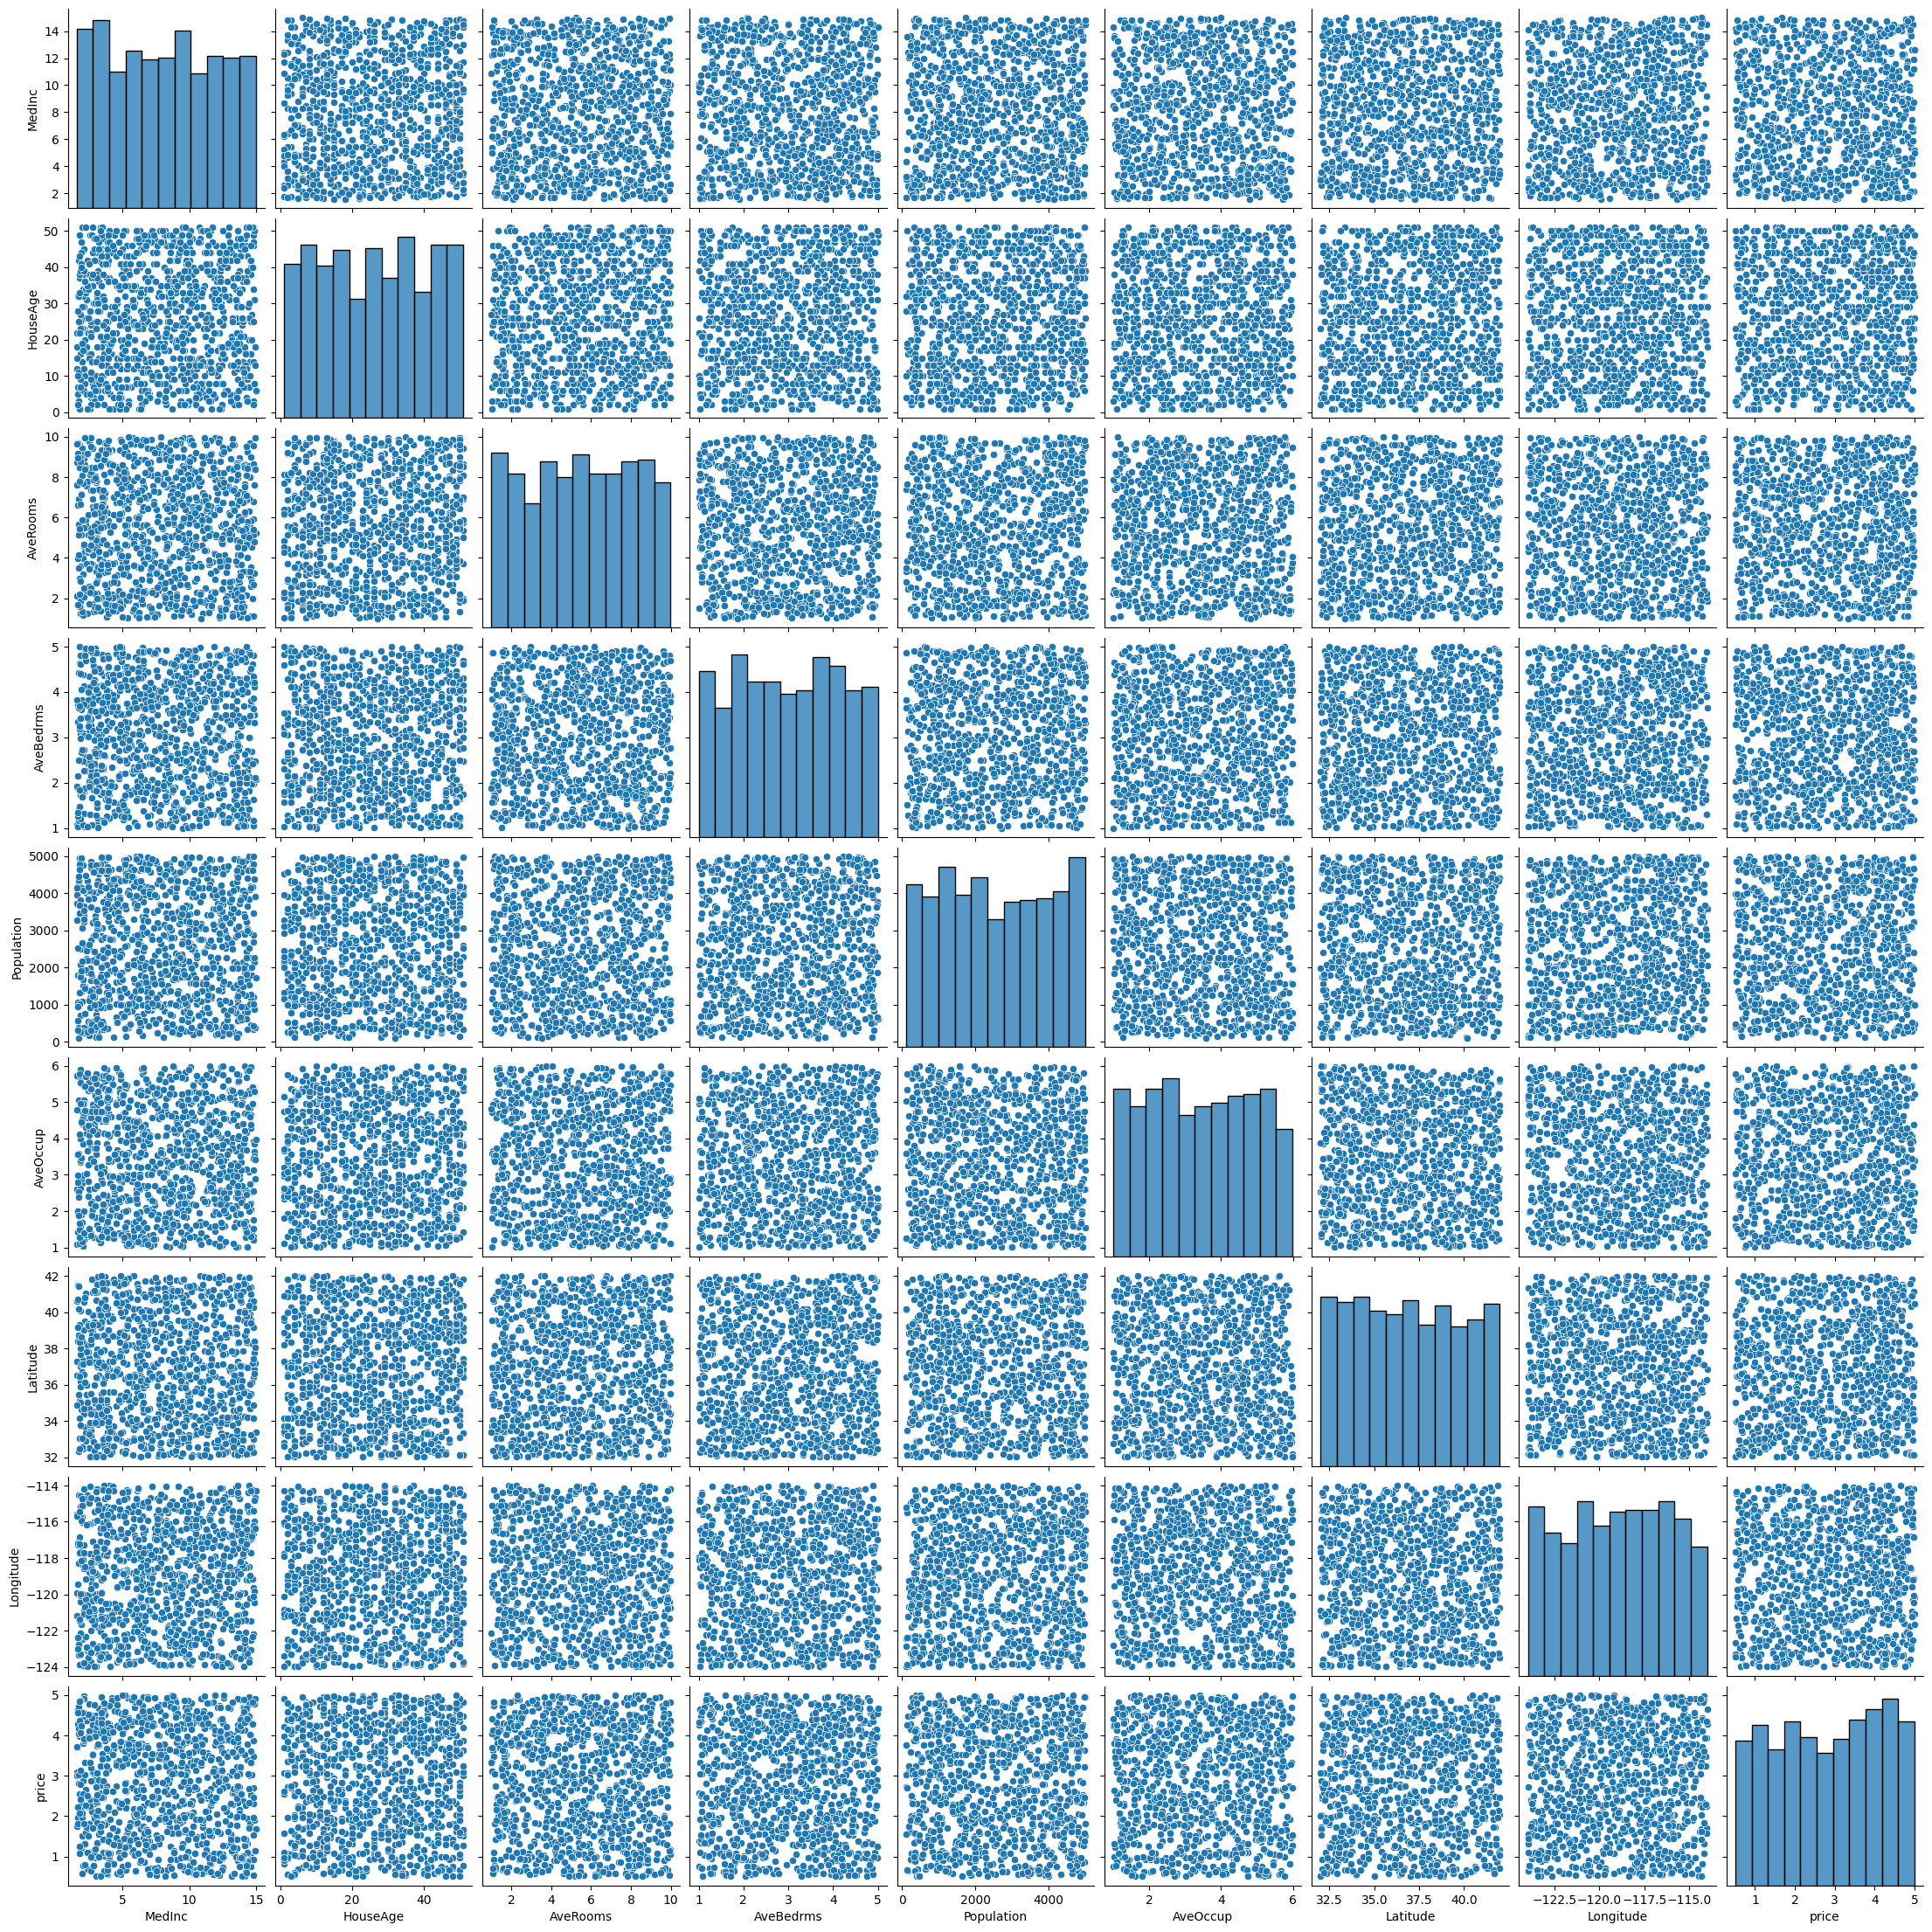

In [17]:
import seaborn as sns
sns.pairplot(dataset)

In [18]:
dataset.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000  0.033640  0.027826  -0.021700   -0.002075 -0.016857   
HouseAge    0.033640  1.000000  0.039600   0.042287    0.035168 -0.016841   
AveRooms    0.027826  0.039600  1.000000  -0.004831    0.034860  0.018889   
AveBedrms  -0.021700  0.042287 -0.004831   1.000000    0.028496  0.036102   
Population -0.002075  0.035168  0.034860   0.028496    1.000000 -0.016754   
AveOccup   -0.016857 -0.016841  0.018889   0.036102   -0.016754  1.000000   
Latitude    0.000759  0.016093  0.056239   0.014416    0.018850 -0.047311   
Longitude   0.064981  0.014943 -0.000734   0.030195    0.044584 -0.043724   
price      -0.033540  0.021085  0.001385   0.007309   -0.023411 -0.006595   

            Latitude  Longitude     price  
MedInc      0.000759   0.064981 -0.033540  
HouseAge    0.016093   0.014943  0.021085  
AveRooms    0.056239  -0.000734  0.001385  
AveBedrms   0.014416   0.030195  0.007309  
Population  0.018850   0.044584 -0.023411  
AveOccup   -0.047311  -0.043724 -0.006595  
Latitude    1.000000  -0.022878  0.020383  
Longitude  -0.022878   1.000000 -0.009507  
price       0.020383  -0.009507  1.000000

Analyzing the Correlated Features

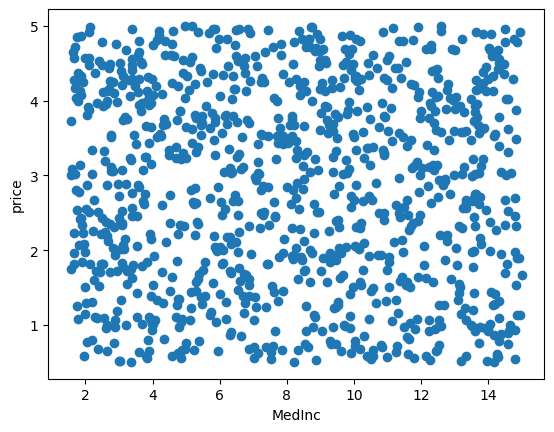

In [19]:
#plt.scatter(dataset['MedInc'],dataset['price'])
#plt.xlabel('MedInc')
#plt.ylabel('price')

import matplotlib.pyplot as plt

plt.scatter(dataset['MedInc'], dataset['price'])
plt.xlabel('MedInc')
plt.ylabel('price')
plt.show()


Text(0, 0.5, 'price')

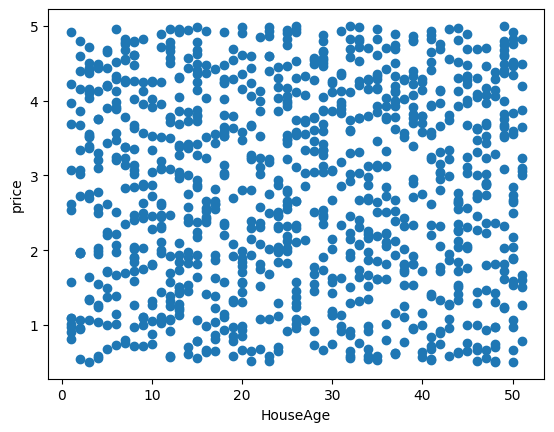

In [20]:
plt.scatter(dataset['HouseAge'],dataset['price'])
plt.xlabel('HouseAge')
plt.ylabel('price')

<AxesSubplot:xlabel='HouseAge', ylabel='price'>

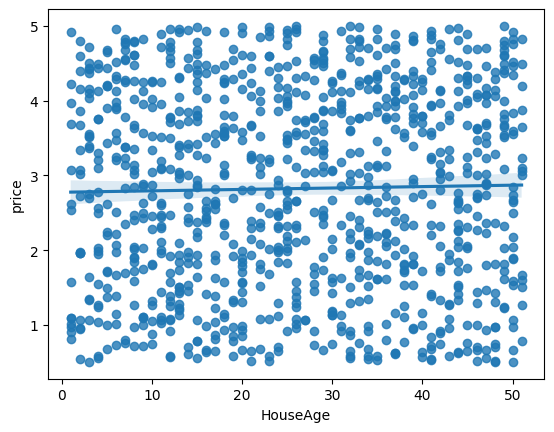

In [21]:
import seaborn as sns
sns.regplot(x='HouseAge',y='price',data=dataset)

Text(0, 0.5, 'price')

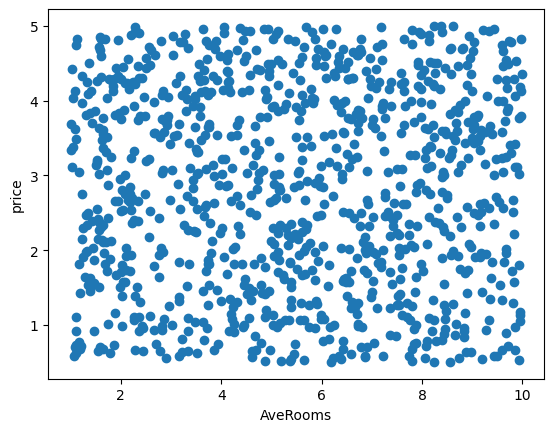

In [22]:
plt.scatter(dataset['AveRooms'],dataset['price'])
plt.xlabel('AveRooms')
plt.ylabel('price')

<AxesSubplot:xlabel='AveRooms', ylabel='price'>

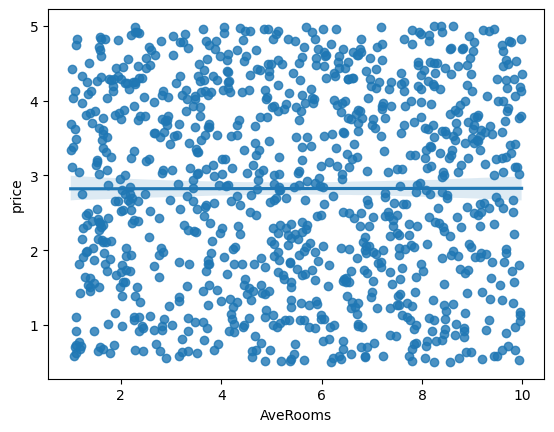

In [23]:
sns.regplot(x='AveRooms',y='price',data=dataset)

<AxesSubplot:xlabel='AveBedrms', ylabel='price'>

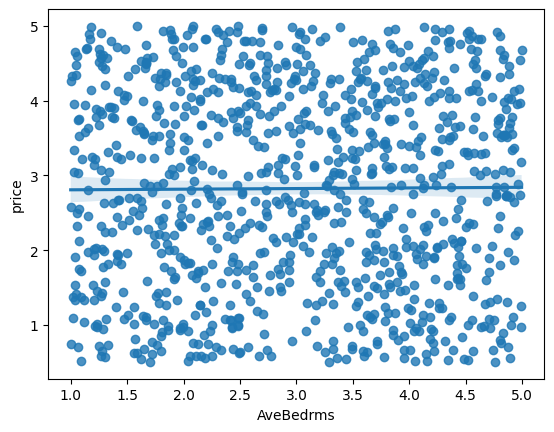

In [24]:
sns.regplot(x="AveBedrms",y="price",data=dataset)

In [25]:
##INdependent and dependent features

x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [26]:
x.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup   Latitude  \
0   6.556292        47  3.919004   3.963616        3782  3.938485  35.808904   
1  14.334643        12  3.997017   2.265081        3053  1.561822  36.960427   
2  11.381918        16  7.025383   1.407570        4582  2.659932  32.077666   
3   9.581890        24  9.947254   2.440936         798  4.908163  36.920920   
4   3.606252        19  6.956553   2.081573         926  3.185258  41.864874   

    Longitude  
0 -116.652382  
1 -121.478560  
2 -119.091897  
3 -123.244667  
4 -117.821333

In [27]:
##Train Test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
x_train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
105   4.865445        20  9.853110   4.388243        3320  3.948267   
68    2.506434        15  9.780492   4.341921        1167  5.559798   
479   8.561821        44  2.833898   2.596141        4656  3.218857   
399  11.686329        24  9.157937   2.227106        4909  5.149106   
434   2.635442        25  7.370516   2.386097        1653  4.357030   
..         ...       ...       ...        ...         ...       ...   
835   7.155494        23  1.518828   3.372633        4157  3.008484   
192  13.655644        12  7.971882   4.909232         988  5.559093   
629   4.907899        16  6.245262   3.163620         762  1.348597   
559   9.874179        24  2.573933   1.637969        2678  5.277756   
684  14.046576        25  1.330492   1.296422        4066  5.240907   

      Latitude   Longitude  
105  37.850352 -115.320334  
68   37.468812 -118.756851  
479  36.683006 -114.966640  
399  34.998743 -121.100752  
434  33.455173 -121.993679  
..         ...         ...  
835  32.508534 -123.203461  
192  32.249841 -116.205170  
629  37.541877 -119.398828  
559  35.416746 -115.453810  
684  41.146946 -116.123232  

[700 rows x 8 columns]

In [29]:
x_test

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
993   9.468114        21  1.421667   4.302844        3440  4.896826   
859   2.387067        35  9.185091   3.438790         254  5.807073   
298   9.909021        22  8.889857   1.005895        4770  5.111141   
553   9.072663        20  6.707279   4.708443        4142  1.691841   
672   2.583156         5  3.491329   1.302799        1370  4.268934   
..         ...       ...       ...        ...         ...       ...   
167   4.018000        50  1.345837   1.199916        3864  2.991403   
998  14.328204         3  1.034379   1.572004        2997  1.013541   
984  11.330548        39  5.470259   3.210649         913  5.108762   
491   9.871790        41  8.139352   2.034847        4039  3.915639   
10    1.777891        37  9.618628   4.639773        4961  5.808079   

      Latitude   Longitude  
993  37.867481 -122.515168  
859  35.029452 -120.589798  
298  32.867830 -115.422359  
553  37.026301 -120.742978  
672  33.889857 -114.038363  
..         ...         ...  
167  39.495456 -116.308923  
998  36.928963 -115.121271  
984  35.110070 -117.120899  
491  35.064423 -122.278313  
10   35.096689 -116.863479  

[300 rows x 8 columns]

In [30]:
##stabdarizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)


StandardScaler()

In [31]:
x_train=scaler.fit_transform(x_train)

In [32]:
x_test=scaler.transform(x_test)

In [33]:
import pickle 
scaler = pickle.load(open('scaling.pkl', 'rb'))
pickle.dump(scaler,open('scaling.pkl','wb'))

In [34]:
x_train

array([[-0.7977202 , -0.42664602,  1.70335382, ...,  0.31889594,
         0.3110114 ,  1.29812979],
       [-1.39493791, -0.76710682,  1.67519713, ...,  1.44662702,
         0.18001242,  0.06425277],
       [ 0.13807056,  1.20756582, -1.01823462, ..., -0.1915376 ,
        -0.08978832,  1.42512304],
       ...,
       [-0.78697245, -0.69901466,  0.30446754, ..., -1.50032444,
         0.20509868, -0.16624844],
       [ 0.4703129 , -0.15427738, -1.11903201, ...,  1.24925695,
        -0.52454959,  1.25020535],
       [ 1.52661527, -0.08618522, -1.60115645, ...,  1.22347104,
         1.44287305,  1.00985029]])

In [35]:
x_test

array([[ 0.36751172, -0.35855386, -1.56580482, ...,  0.98268654,
         0.31689269, -1.2851663 ],
       [-1.4251574 ,  0.59473638,  1.44434009, ...,  1.61966716,
        -0.6575242 , -0.59386472],
       [ 0.47913378, -0.2904617 ,  1.32986753, ...,  1.13266159,
        -1.39970151,  1.26149786],
       ...,
       [ 0.83901376,  0.86710502,  0.00397251, ...,  1.13099716,
        -0.62984447,  0.65163906],
       [ 0.46970813,  1.00328934,  1.03887121, ...,  0.29606298,
        -0.64551692, -1.2001238 ],
       [-1.57937907,  0.7309207 ,  1.61243683, ...,  1.62037138,
        -0.63443885,  0.74406532]])

Model Trainning

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regression=LinearRegression()

In [38]:
regression.fit(x_train,y_train)

LinearRegression()

In [39]:
##print the coefficients and the intercept
print(regression.coef_)

[-0.04410149  0.07778459  0.00080907  0.04104171 -0.04700191 -0.02507553
  0.06825724  0.01564006]


In [40]:
print(regression.intercept_)

2.792561645633469


In [41]:
##On which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [42]:
###Prediction with test Data
reg_pred=regression.predict(x_test)

In [43]:
reg_pred

array([2.74138801, 2.89856581, 2.50160722, 2.78021162, 2.65989308,
       2.82542204, 2.76523908, 2.66398794, 2.53420354, 2.89885433,
       3.01605394, 2.72480014, 2.75948409, 2.84795139, 2.7381945 ,
       2.58908261, 2.58810174, 2.75006266, 2.65035593, 2.78033045,
       2.67321255, 2.88122167, 2.67726074, 2.6578104 , 2.92809565,
       2.58749713, 2.67042353, 2.73526952, 2.84730645, 2.62303118,
       2.75895706, 2.90172948, 2.71697171, 2.93260162, 2.49071608,
       2.76884609, 2.82239054, 2.90113235, 2.82452541, 2.61832961,
       2.84580384, 2.71084021, 2.86884354, 2.91070812, 2.76975381,
       2.90945335, 2.94466369, 2.64898715, 2.77359484, 2.68017895,
       2.86304626, 2.77268131, 2.77294425, 2.82453149, 3.0166911 ,
       2.94424659, 2.72343303, 2.66438224, 2.93042095, 2.55415016,
       2.7253274 , 2.72923825, 2.70275459, 2.90858276, 2.96972529,
       2.94205291, 2.63833237, 2.53488217, 2.85121445, 3.15652447,
       2.79367259, 2.73131752, 2.68019099, 2.94709155, 3.07757

Assumptions

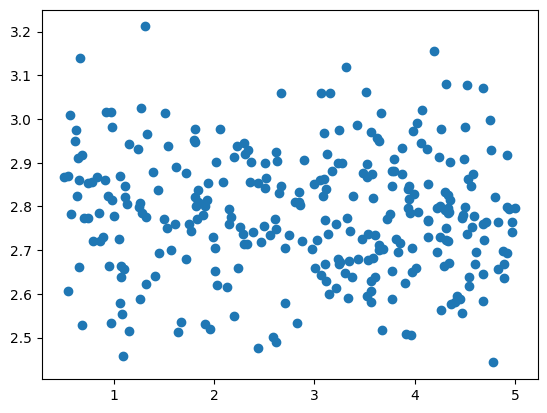

In [44]:
##plot a sactter plot for the prediction
plt.scatter(y_test,reg_pred)

In [45]:
##Residuals
residuals=y_test-reg_pred

In [46]:
residuals

993   -0.355493
859   -0.386344
298    0.080488
553   -0.886430
672   -0.422191
         ...   
167   -1.396489
998    1.825656
984    1.975932
491    2.176707
10     1.161268
Name: price, Length: 300, dtype: float64

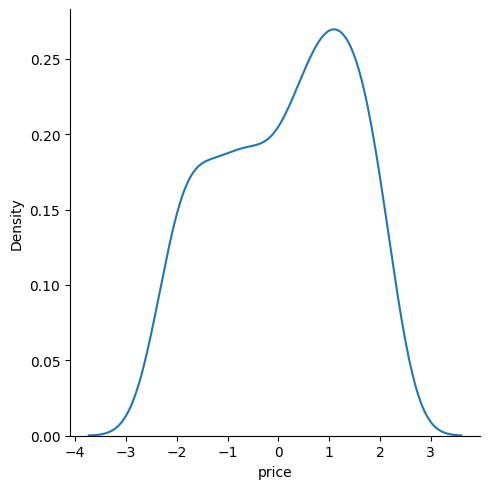

In [47]:
##plot this residuals

sns.displot(residuals,kind="kde")

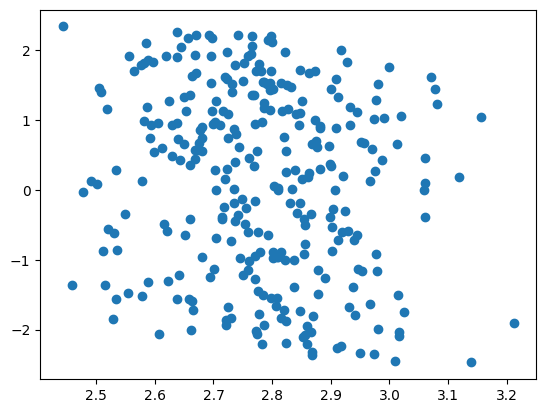

In [48]:
##scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1.1518109267838936
1.7459222269018297
1.3213335032844016


## R square and adjusted R square

formula

R^2 = 1.SSR/SST

R^2 = coeffcient of determination SSR = sum of squares of residuals SST = total sum of squares

In [50]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

-0.033040754569276354


Adjusted R2 = 1- [(1-r2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The numbers of the predicted variables

In [51]:
#display adjusted R.square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-0.061440500399359665

New Data Prediction

In [52]:
#fetch_california_housing().data[0].reshape(1,-1)
data = pd.read_csv("synthetic_california_housing.csv")
first_row = data.iloc[0, :-1].values.reshape(1, -1) 
print(first_row)


[[   6.5562916    47.            3.91900378    3.96361622 3782.
     3.93848509   35.80890363 -116.65238189]]


In [60]:
##Transformation of new data
#scaler.transform(fetch_california_housing().data[0].reshape(1,-1))



sample_data = data.iloc[0, :-1].values.reshape(1, -1)
scaled_data = scaler.transform(sample_data)



d:\ML1\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
#regression.predict(fetch_california_housing().data[0].reshape(1,-1))

sample = data.iloc[0, :-1].values.reshape(1, -1)

prediction = regression.predict(sample)
print(prediction)

[-170.91505925]


Pickling the Model file for Deployment

In [55]:
import pickle

In [56]:
pickle.dump(regression,open('regmodel.pkl','wb'))


In [57]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [58]:
#prediction
#pickled_model.predict(scaler.transform(fetch_california_housing().data[0].reshape(1,-1)))

X_sample = data.iloc[0, :-1].values.reshape(1, -1)
X_scaled = scaler.transform(X_sample)
prediction = pickled_model.predict(X_scaled)

print(prediction)


[2.89346512]


d:\ML1\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
